In [215]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [216]:
# read in data file
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [217]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [226]:
# what values to we want to predict
predict = "G3" # label

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)

In [219]:
best = 0

for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)
    # Implement algorithm
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)
    
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)


0.7951445586953876
0.8711271764484376
0.8569482292121067
0.8897861613868713
0.7552497842922802
0.7762940455291525
0.7894451394298494
0.8452333252522201
0.9034549695108318
0.9157556449983455
0.8261335272835394
0.7320403642421982
0.7249489684784005
0.8415841550273897
0.8134182915292171
0.6539855921114959
0.8047291542315588
0.798853872684083
0.9071975862786833
0.7347633420431916
0.7766691756852604
0.8754078790471402
0.8393199245384051
0.7529646380503332
0.8410693197841256
0.8158668189249256
0.7393842425318045
0.8466834867832037
0.8868914657896622
0.8335147970109422


In [220]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [221]:
# (y = mx+c)
print("Co: " ,linear.coef_) # (m) coefficient
print("Intercept :",linear.intercept_)

Co:  [ 0.17191616  0.96524992 -0.21509814 -0.34033299  0.04565513]
Intercept : -1.5479873124290648


In [222]:
predictions = linear.predict(x_test)

# print out all predictions
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

9.576097722412504 [10 10  2  0  4] 11
9.576097722412504 [10 10  2  0  4] 10
10.385082163697346 [10 11  4  0 10] 11
6.01754016458472 [7 8 2 3 2] 9
5.582397571960365 [5 8 2 3 0] 7
9.1890834212228 [ 9 10  3  0  4] 10
15.342534005279319 [16 15  2  0  2] 15
9.56539334904509 [11 10  2  0  0] 10
6.950728202955224 [9 8 2 1 0] 0
12.409360341323424 [14 12  1  0  4] 11
10.745741403154755 [11 11  1  0  0] 12
11.630385423946553 [10 12  1  0  2] 12
9.178379047855385 [10 10  3  0  0] 9
11.544021471072181 [12 12  3  0  2] 11
14.778657226715893 [12 15  1  0  0] 15
9.812604607960779 [ 8 10  1  0 12] 10
15.17061784290306 [15 15  2  0  2] 16
3.07366212726141 [6 5 1 3 0] 0
11.97421774869907 [12 12  1  0  2] 11
4.936123143850754 [6 6 2 0 2] 6
12.054823643203491 [13 12  1  0  0] 12
14.864209436217777 [15 15  3  0  0] 15
14.248549904044028 [14 14  1  0  2] 13
11.66780934201379 [12 12  2  0  0] 11
13.02007355849971 [13 13  1  0  0] 12
12.589877280872821 [13 13  3  0  0] 13
14.129708348099884 [16 14  4  0  6] 1

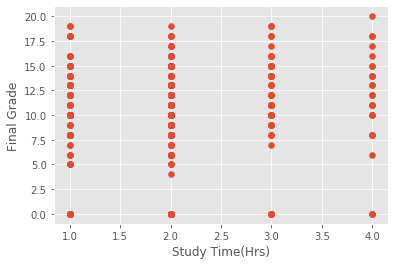

In [224]:
# Plotting on a grid

study = "studytime"
p = "G1"
p1 = "G3"
style.use("ggplot")
pyplot.scatter(data[study], data[p1])
pyplot.xlabel("Study Time(Hrs)")
pyplot.ylabel("Final Grade")
pyplot.show()